In [3]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
print("My name is {Zijie Lin}")
print("My NetID is: {zlin36}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
df = pd.read_csv('ccdefault.csv')
print (df.head())
X, y = df.iloc[:,1:-1], df.iloc[:,-1]

My name is {Zijie Lin}
My NetID is: {zlin36}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ..

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42)
rfr = RandomForestClassifier(n_estimators = 2)
rfr.fit(X_train, y_train)
print ('n_estimators = 2')
cvscore = cross_val_score(rfr, X_train, y_train, cv = 10)
print(cvscore)
print ('mean =', np.mean(cvscore))
rfr = RandomForestClassifier(n_estimators = 10)
rfr.fit(X_train, y_train)
print ('n_estimators = 10')
cvscore = cross_val_score(rfr, X_train, y_train, cv = 10)
print(cvscore)
print ('mean =', np.mean(cvscore))
rfr = RandomForestClassifier(n_estimators = 20)
print ('n_estimators = 20')
cvscore = cross_val_score(rfr, X_train, y_train, cv = 10)
print(cvscore)
print ('mean =', np.mean(cvscore))
rfr = RandomForestClassifier(n_estimators = 200)
rfr.fit(X_train, y_train)
print ('n_estimators = 200')
cvscore = cross_val_score(rfr, X_train, y_train, cv = 10)
print(cvscore)
print ('mean =', np.mean(cvscore))

n_estimators = 2
[0.77748982 0.78711588 0.79118845 0.7862963  0.7862963  0.7837037
 0.77666667 0.78918118 0.77436087 0.77102631]
mean = 0.7823325471929014
n_estimators = 10
[0.80192521 0.79192892 0.81932618 0.79888889 0.80703704 0.79925926
 0.80777778 0.80733605 0.80288996 0.79844387]
mean = 0.8034813144286719
n_estimators = 20
[0.80118475 0.80636801 0.81858571 0.81296296 0.81555556 0.80888889
 0.8162963  0.8095591  0.79733235 0.81141163]
mean = 0.8098145246151104
n_estimators = 200
[0.81340244 0.80451685 0.82450944 0.81814815 0.82185185 0.81074074
 0.82444444 0.81511671 0.80881808 0.81030011]
mean = 0.8151848817100635


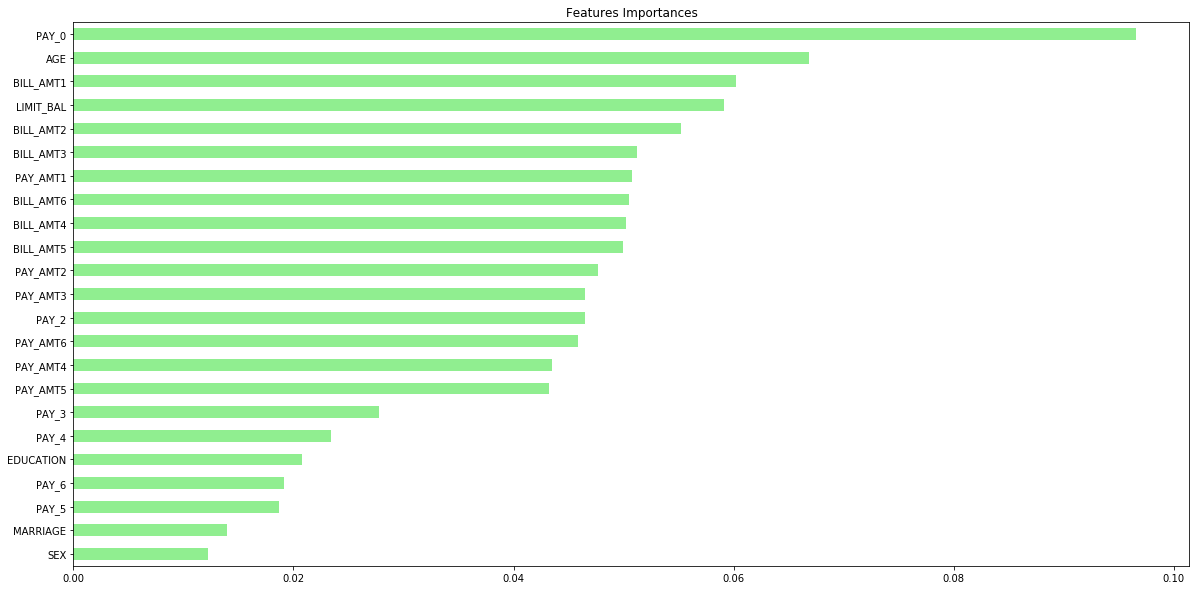

In [7]:
#feature importance
import matplotlib.pyplot as plt
import pandas as pd
importances = pd.Series(data=rfr.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(20,10))
importances_sorted.plot(kind='barh', color='lightgreen')

plt.title('Features Importances')
plt.show()